## Insight 2 

According to the word cloud, 'credit card', 'customer service', 'late fee', and 'checking account' are prominent in complaint narratives that result in monetary relief. 'customer service' and 'late fee' are the most intriguing because they do NOT appear on the list of top 10 products addressed in complaints featuring narratives and monetary relief. Thus, poor customer service and inappropriate late fees might be issues worth exploring to better contextualize the complaints.

American Express, Bank of America, Capital One, Citibank, and Wells Fargo, all appear in both the word cloud and among the top 10 companies addressed in complaints featuring narratives and monetary relief. Their appearance in the word cloud does not add context to undersatdning the compalint. The NLP data processing step should add company names to the stopword list in order to prevent company names from being influental features in a model to monetary relief prediction model. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import nltk

from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

from nltk import word_tokenize          
from nltk.stem import WordNetLemmatizer 
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, auc, f1_score, classification_report

from sklearn.preprocessing import LabelEncoder

# Silence the Warnings :)
import warnings
warnings.filterwarnings('ignore') 
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)

In [2]:
# Load data

data = pd.read_csv('complaints.csv')
data.shape

(1489331, 18)

In [3]:
# Subset only data that includes consumer complaint narratives & complaints closed with monetary relief

df_narr_mon = data[(data['Consumer complaint narrative'].isnull()==False)
                        &  (data['Company response to consumer']=="Closed with monetary relief")]
df_narr_mon.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
187,2019-01-10,Credit card or prepaid card,General-purpose credit card or charge card,Problem with a purchase shown on your statement,Credit card company isn't resolving a dispute ...,"On XX/XX/XXXX, Bank of America mailed out a ca...",Company has responded to the consumer and the ...,"BANK OF AMERICA, NATIONAL ASSOCIATION",CA,940XX,NaN,Consent provided,Web,2019-01-10,Closed with monetary relief,Yes,NaN,3121663
204,2019-07-11,Student loan,Federal student loan servicing,Dealing with your lender or servicer,Received bad information about your loan,I was informed on XX/XX/XXXX that FedLoan Serv...,NaN,AES/PHEAA,NV,NaN,NaN,Consent provided,Web,2019-07-11,Closed with monetary relief,Yes,NaN,3302666
245,2019-01-11,Credit card or prepaid card,Gift card,Unexpected or other fees,NaN,"On XX/XX/XXXX, I purchased two {$500.00} visa ...",NaN,Blackhawk Network Holdings Inc.,CA,940XX,NaN,Consent provided,Web,2019-01-28,Closed with monetary relief,Yes,NaN,3122289
256,2019-02-19,Credit card or prepaid card,Store credit card,"Advertising and marketing, including promotion...",Didn't receive advertised or promotional terms,"Dear Consumer Financial Protection Bureau, Syn...",Company has responded to the consumer and the ...,SYNCHRONY FINANCIAL,TX,750XX,Servicemember,Consent provided,Web,2019-02-19,Closed with monetary relief,Yes,NaN,3157120
279,2017-04-13,Credit card,NaN,Other,NaN,I was stupid enough to charge some items at MA...,Company has responded to the consumer and the ...,"CITIBANK, N.A.",NC,286XX,NaN,Consent provided,Web,2017-04-13,Closed with monetary relief,Yes,No,2432795


In [4]:
df_narr_mon.shape

(26200, 18)

In [11]:
# Make dataframe ranking companies addressed in complaints with narratives and which resulted in monetary relief

top_co = df_narr_mon['Company'].value_counts().rename_axis('Company').reset_index(name='Count')
top_co.head(10)

,Company,Count
0,"BANK OF AMERICA, NATIONAL ASSOCIATION",3653
1,"CITIBANK, N.A.",3208
2,JPMORGAN CHASE & CO.,2455
3,WELLS FARGO & COMPANY,1887
4,SYNCHRONY FINANCIAL,1598
5,CAPITAL ONE FINANCIAL CORPORATION,1195
6,AMERICAN EXPRESS COMPANY,892
7,TD BANK US HOLDING COMPANY,800
8,U.S. BANCORP,778
9,BARCLAYS BANK DELAWARE,638


In [12]:
# Make dataframe ranking products addressed in complaints with narratives and which resulted in monetary relief

top_product = df_narr_mon['Product'].value_counts().rename_axis('Product').reset_index(name='Count')
top_product.head(10)

,Product,Count
0,Credit card or prepaid card,5806
1,Checking or savings account,4839
2,Credit card,4327
3,Bank account or service,3480
4,Mortgage,2353
5,Debt collection,1003
6,"Credit reporting, credit repair services, or o...",753
7,"Money transfer, virtual currency, or money ser...",635
8,Consumer Loan,597
9,Student loan,578


# Build Wordcloud 

In [10]:
text = " ".join(response for response in df_narr_mon['Consumer complaint narrative'[0:26200]])
text.lower()
print ("There are {} words in the corpus of all consumer complaint narratives resolved with monetary relief.".format(len(text)))

There are 37667610 words in the corpus of all consumer complaint narratives resolved with monetary relief.


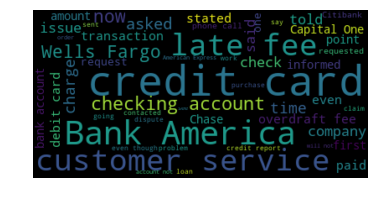

In [8]:
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.remove("no")
stopwords.remove("not")
stopwords.update(["xx", "xxx", "xxxx"])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, max_font_size=50, max_words=50,
                       background_color="black").generate(text)# Display the generated image:

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [9]:
# Save the image:
output = wordcloud.to_file("wordcloud_Monetary-Relief-Complaint-Narratives.png")